In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_68k_Zheng\Zheng_PBMC.h5ad")
print('Original adata:', adata.shape)
# label = adata.obs['celltype.l1'].tolist()
# types = np.unique(label).tolist()
adata_leiden = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_68k_Zheng\Zheng_PBMC_HVG2000_leiden_subset.h5ad")
label_leiden = adata_leiden.obs['leiden_cluster'].tolist()
# add leiden clusters to the original adata
adata.obs['leiden_cluster'] = label_leiden
unique_leiden = np.unique(label_leiden).tolist()

print('all leiden:', unique_leiden)
print('====================')
# del adata


Original adata: (68579, 32738)
all leiden: ['Leiden_0', 'Leiden_1', 'Leiden_10', 'Leiden_11', 'Leiden_12', 'Leiden_13', 'Leiden_14', 'Leiden_15', 'Leiden_2', 'Leiden_3', 'Leiden_4', 'Leiden_5', 'Leiden_6', 'Leiden_7', 'Leiden_8', 'Leiden_9']


In [15]:
adata.obs.head()

,celltype,TSNE.1,TSNE.2,leiden_cluster
AAACATACACCCAA-1,CD8+ Cytotoxic T,7.565540,0.441370,Leiden_1
AAACATACCCCTCA-1,CD8+/CD45RA+ Naive Cytotoxic,2.552626,-25.786672,Leiden_4
AAACATACCGGAGA-1,CD4+/CD45RO+ Memory,-5.771831,11.830846,Leiden_0
AAACATACTAACCG-1,CD19+ B,1.762556,25.979346,Leiden_7
AAACATACTCTTCA-1,CD4+/CD25 T Reg,-16.793856,-16.589970,Leiden_3


In [4]:
adata.var_names

Index(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000237683',
       'ENSG00000239906', 'ENSG00000241599', 'ENSG00000228463',
       'ENSG00000237094',
       ...
       'ENSG00000217792', 'ENSG00000268276', 'ENSG00000148828',
       'ENSG00000215700', 'ENSG00000215699', 'ENSG00000215635',
       'ENSG00000268590', 'ENSG00000251180', 'ENSG00000215616',
       'ENSG00000215611'],
      dtype='object', length=32738)

## Read features

In [6]:
import os
os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Zheng\Leiden_HVG_PreLect\feature_selection")

features_dict = {}
# Read features for each celltype
for clus in unique_leiden:
    try:
        feature_df = pd.read_csv(f'{clus}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[clus] = feature_df
    except:
        print('skipping:', clus)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [9]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
Leiden_0,97,45
Leiden_1,21,12
Leiden_2,141,79
Leiden_3,89,46
Leiden_4,152,106
Leiden_5,17,7
Leiden_6,22,6
Leiden_7,12,4
Leiden_8,7,5
Leiden_9,7,3


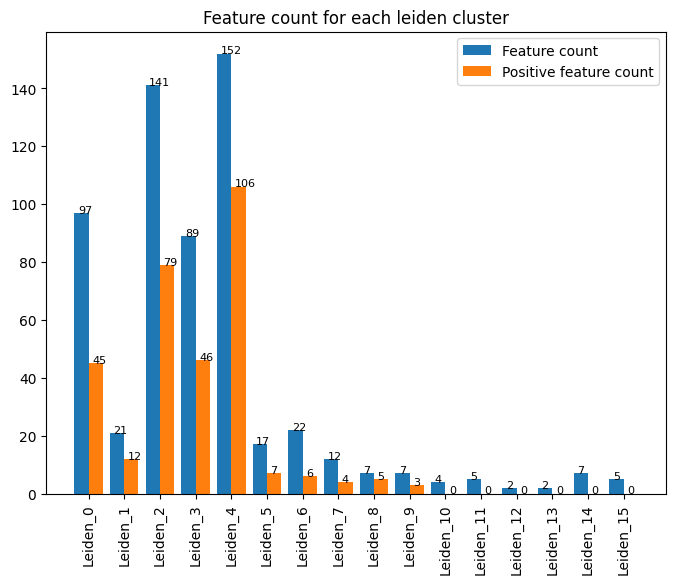

In [11]:
# Sort count_df by 'Feature_count' in descending order
# count_df = count_df.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.3, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i+0.1, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Feature count for each leiden cluster')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot cell number

In [17]:
counts = adata.obs['leiden_cluster'].value_counts()
# counts = counts.sort_index()
counts

leiden_cluster
Leiden_0     11601
Leiden_1      9488
Leiden_2      9408
Leiden_3      9046
Leiden_4      8167
Leiden_5      6801
Leiden_6      4578
Leiden_7      3815
Leiden_8      2893
Leiden_9      1767
Leiden_10      364
Leiden_11      216
Leiden_12      164
Leiden_13      145
Leiden_14       77
Leiden_15       49
Name: count, dtype: int64

In [18]:
sum(counts)

68579

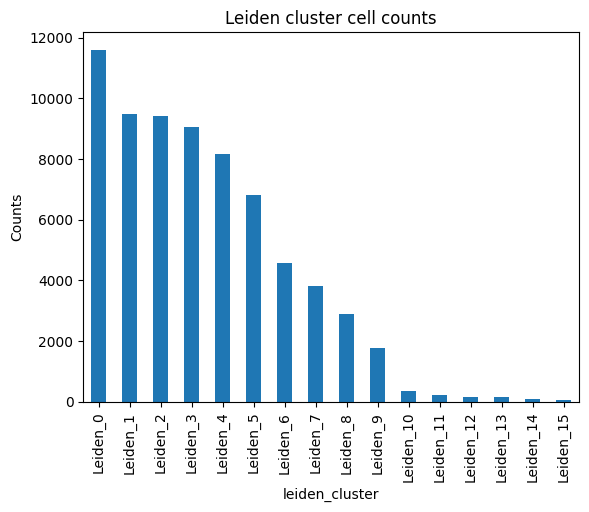

In [19]:
counts.plot(kind='bar')
plt.title('Leiden cluster cell counts')
plt.ylabel('Counts')
plt.show()